<a href="https://colab.research.google.com/github/RFJC21/Regression_polynomial_ann/blob/master/HousePrices_ANN_LR_PL_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data from scikitlearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas_profiling 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Multivariate Linear Regression vs ANN Keras Regression vs Polynomial Regression vs SVR vs Decision Trees

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [300]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [104]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


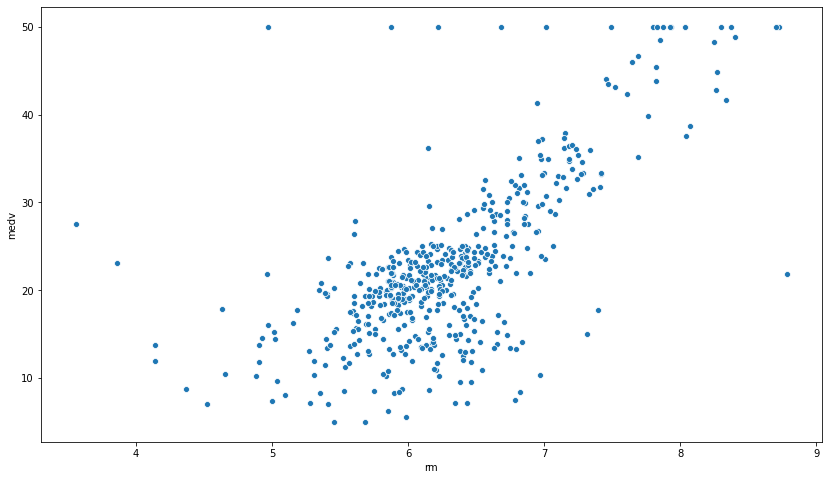

In [105]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='rm',y='medv',data=df)

In [0]:
df=df.drop('Unnamed: 0',axis=1)

In [107]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


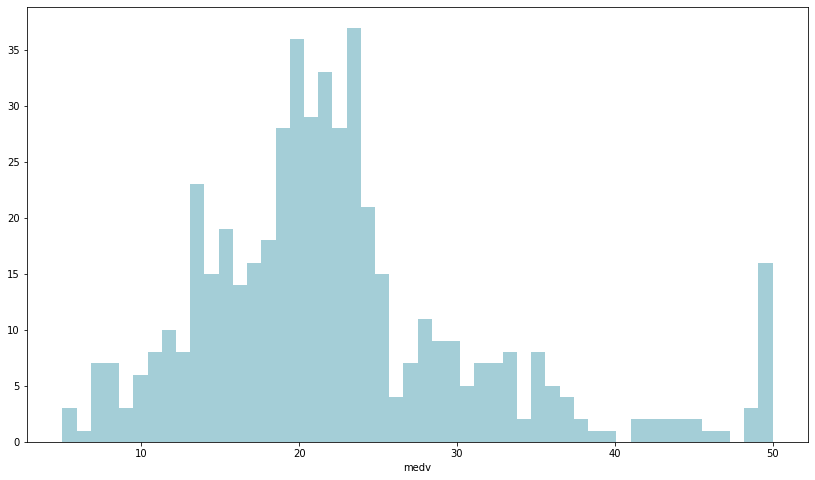

In [108]:
plt.figure(figsize=(14,8))
sns.distplot(df['medv'],bins=50, kde=False,color='#1c869c')

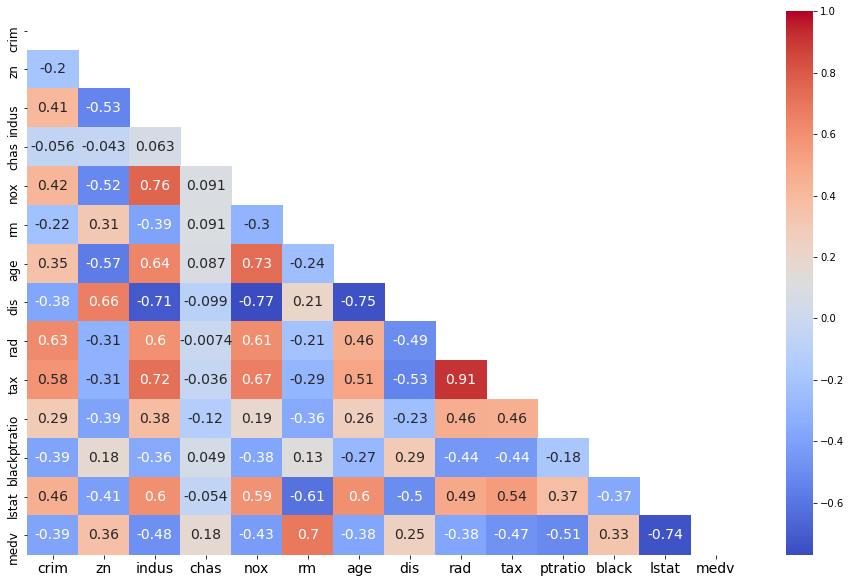

In [109]:
correlation=df.corr()

mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

#Heat Map com matplotlib and seaborn
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

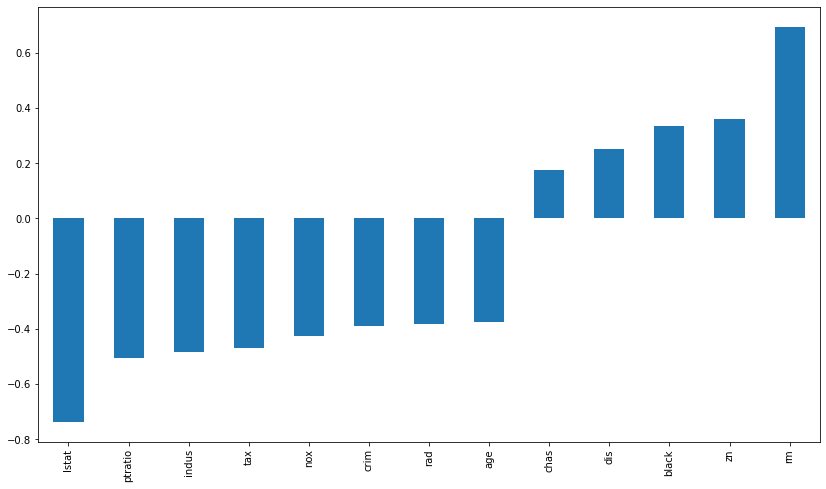

In [110]:
plt.figure(figsize=(14,8))
df.corr()['medv'].sort_values().drop('medv').plot(kind='bar')

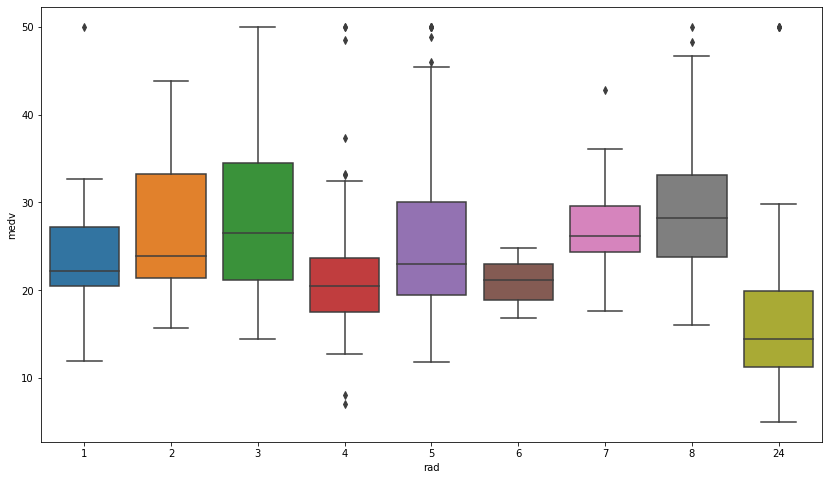

In [111]:
plt.figure(figsize=(14,8))
sns.boxplot(x='rad',y='medv',data=df)

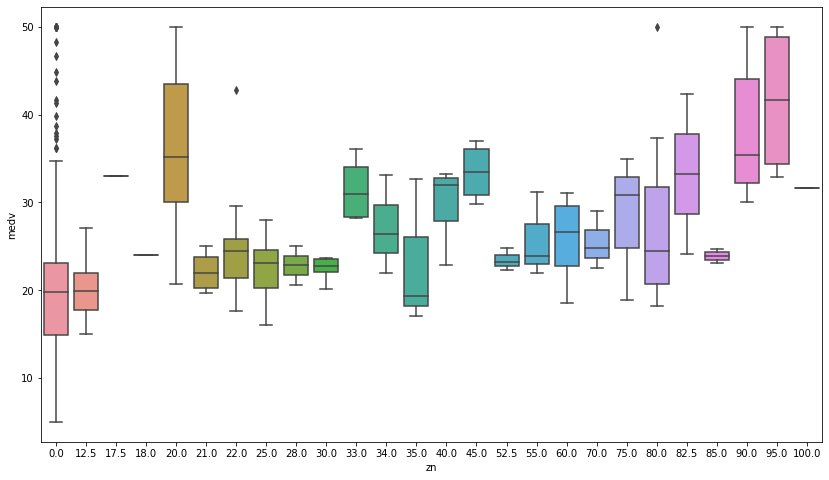

In [112]:
plt.figure(figsize=(14,8))
sns.boxplot(x='zn',y='medv',data=df)

# Multivariate Linear Regression

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [302]:
X

array([[1.0e+00, 6.3e-03, 1.8e+01, ..., 1.5e+01, 4.0e+02, 5.0e+00],
       [2.0e+00, 2.7e-02, 0.0e+00, ..., 1.8e+01, 4.0e+02, 9.1e+00],
       [3.0e+00, 2.7e-02, 0.0e+00, ..., 1.8e+01, 3.9e+02, 4.0e+00],
       ...,
       [5.0e+02, 6.1e-02, 0.0e+00, ..., 2.1e+01, 4.0e+02, 5.6e+00],
       [5.0e+02, 1.1e-01, 0.0e+00, ..., 2.1e+01, 3.9e+02, 6.5e+00],
       [5.1e+02, 4.7e-02, 0.0e+00, ..., 2.1e+01, 4.0e+02, 7.9e+00]])

# Scale Features

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
X=sc.fit_transform(X)

# Create Model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [299]:
X_test.shape

(102, 13)

# Fit Model

In [306]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[24.7 22.6]
 [23.8 50. ]
 [29.3 23. ]
 [12.1  8.3]
 [21.6 21.2]
 [19.5 19.9]
 [20.4 20.6]
 [21.1 18.7]
 [18.7 16.1]
 [20.1 18.6]
 [ 5.1  8.8]
 [16.4 17.2]
 [17.  14.9]
 [ 5.6 10.5]
 [40.1 50. ]
 [32.4 29. ]
 [22.4 23. ]
 [36.9 33.3]
 [30.9 29.4]
 [23.4 21. ]
 [24.6 23.8]
 [24.7 19.1]
 [20.7 20.4]
 [30.3 29.1]
 [22.6 19.3]
 [10.3 23.1]
 [17.9 19.6]
 [18.4 19.4]
 [35.6 38.7]
 [21.1 18.7]
 [18.2 14.6]
 [17.7 20. ]
 [19.8 20.5]
 [24.  20.1]
 [29.1 23.6]
 [19.4 16.8]
 [11.2  5.6]
 [24.7 50. ]
 [17.6 14.5]
 [15.4 13.3]
 [26.  23.9]
 [21.  20. ]
 [22.1 19.8]
 [15.5 13.8]
 [22.7 16.5]
 [25.3 21.6]
 [19.9 20.3]
 [23.  17. ]
 [10.1 11.8]
 [24.5 27.5]
 [21.1 15.6]
 [17.  23.1]
 [24.5 24.3]
 [29.9 42.8]
 [13.5 15.6]
 [22.  21.7]
 [20.5 17.1]
 [15.2 17.2]
 [14.  15. ]
 [22.1 21.7]
 [17.5 18.6]
 [21.4 21. ]
 [32.8 33.1]
 [31.1 31.5]
 [17.7 20.1]
 [32.9 29.8]
 [18.7 15.2]
 [20.  15. ]
 [19.  27.5]
 [22.9 22.6]
 [23.1 20. ]
 [24.2 21.4]
 [31.  23.5]
 [28.7 31.2]
 [25.8 23.7]
 [ 5.3  7.4]
 [36.7 48.3]

In [308]:
pd.DataFrame({'y_pred: ':y_pred, 'y_reeal: ':y_test})

,y_pred:,y_reeal:
0,24.740709,22.6
1,23.804250,50.0
2,29.281587,23.0
3,12.122727,8.3
4,21.625445,21.2
...,...,...
97,25.681895,24.7
98,15.535477,14.1
99,18.117483,18.7
100,25.270993,28.1


# Evaluate

In [309]:
# r_squared for trainning and test data
print('Trainning data r_squared: ', regressor.score(X_train,y_train))
print('Test data r_squared: ', regressor.score(X_test,y_test))

Trainning data r_squared:  0.77329841622637
Test data r_squared:  0.5914577039362052


In [310]:
import math
mlr_rmse_LR = math.sqrt(mean_squared_error(y_test, y_pred))
mlr_rmse_LR

5.76775185485984

In [312]:
MAE_LR=mean_absolute_error(y_test,y_pred)
MAE_LR

3.838476893830888

In [123]:
df.head(11)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [124]:
x_incl_const=sm.add_constant(X_train)
model=sm.OLS(y_train,x_incl_const)
results=model.fit()
results.pvalues

array([7.9e-281, 1.2e-003, 2.1e-003, 9.3e-001, 9.8e-003, 1.5e-004,
       6.8e-015, 8.3e-001, 2.8e-010, 5.6e-004, 5.1e-003, 1.7e-013,
       6.3e-003, 5.3e-018])

In [125]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [0]:
columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

In [127]:
pd.DataFrame({ 'columns: ':columns,'p-values: ':results.pvalues})

,columns:,p-values:
0,crim,7.880479e-281
1,zn,1.222501e-03
2,indus,2.060526e-03
3,chas,9.311050e-01
4,nox,9.826245e-03
5,rm,1.503121e-04
6,age,6.837385e-15
7,dis,8.276851e-01
8,rad,2.771759e-10
9,tax,5.570378e-04


# Predictions

In [0]:
df1=df.drop('medv',axis=1)

In [129]:
house_prediction=df1.head(10)
house_prediction

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_prediction=sc.transform(house_prediction.values.reshape(-1,13))

In [0]:
pred_houses = regressor.predict(house_prediction)

In [132]:
pred_houses

array([30.5, 25.2, 30.5, 28.6, 28. , 25.3, 23.6, 20.3, 12.7, 19.7])

In [133]:
df_lr = pd.DataFrame(pred_houses, columns=['Predictions_lr'])
df_lr

,Predictions_lr
0,30.499498
1,25.172480
2,30.546654
3,28.606948
4,27.969583
5,25.337665
6,23.603188
7,20.256071
8,12.651475
9,19.699869


# Evaluate

In [134]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.8429092204444966

In [135]:
import math
mlr_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mlr_rmse

5.783509315085136

In [136]:
df['medv'].mean()

22.532806324110698

# ANN Regression

In [0]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [313]:
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
df=df.drop('Unnamed: 0',axis=1)

# Train and scale features

In [0]:
#.values because of the validation data
X=df.drop('medv',axis=1).values
y=df['medv'].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model with early stopping and dropout layer

In [0]:
model=Sequential()

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [319]:
X_test.shape

(102, 13)

In [0]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [321]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
# because of the size of trainning data, lets use batch sizes
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),Callbacks=[early_stop],epochs=700)

Epoch 1/700
13/13 [==============================] - 0s 8ms/step - loss: 557.7056 - val_loss: 447.0182
Epoch 2/700
13/13 [==============================] - 0s 5ms/step - loss: 380.2963 - val_loss: 177.4977
Epoch 3/700
13/13 [==============================] - 0s 4ms/step - loss: 163.7591 - val_loss: 104.3793
Epoch 4/700
13/13 [==============================] - 0s 4ms/step - loss: 106.9594 - val_loss: 69.9776
Epoch 5/700
13/13 [==============================] - 0s 5ms/step - loss: 85.4406 - val_loss: 57.0985
Epoch 6/700
13/13 [==============================] - 0s 5ms/step - loss: 60.4901 - val_loss: 57.6149
Epoch 7/700
13/13 [==============================] - 0s 4ms/step - loss: 50.6007 - val_loss: 60.0977
Epoch 8/700
13/13 [==============================] - 0s 6ms/step - loss: 52.2806 - val_loss: 54.3323
Epoch 9/700
13/13 [==============================] - 0s 5ms/step - loss: 47.8692 - val_loss: 48.2167
Epoch 10/700
13/13 [==============================] - 0s 4ms/step - loss: 38.5232 - 

# Plot Loss

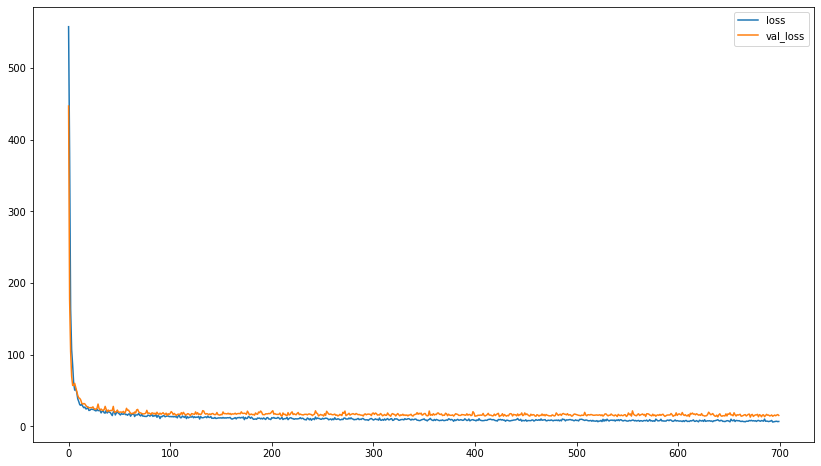

In [322]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

In [0]:
predictions=model.predict(X_test)

In [324]:
predictions

array([[25.1],
       [26.7],
       [24.2],
       [10.2],
       [20.9],
       [20.2],
       [22.1],
       [20.3],
       [20.4],
       [19.4],
       [10. ],
       [12.9],
       [15. ],
       [ 8.6],
       [46.6],
       [34.1],
       [22.3],
       [37.9],
       [30.6],
       [22.1],
       [23.9],
       [20.6],
       [21.2],
       [26.8],
       [20.8],
       [25.3],
       [17. ],
       [17.7],
       [38.5],
       [19.5],
       [17.4],
       [17.6],
       [21.1],
       [21.5],
       [25.8],
       [21.6],
       [ 9.9],
       [31.8],
       [15. ],
       [17.1],
       [23.4],
       [21.4],
       [22.2],
       [20.8],
       [20.1],
       [22.1],
       [20.9],
       [17.7],
       [16.2],
       [23.4],
       [14.9],
       [23.9],
       [22.9],
       [40.3],
       [14.9],
       [21.7],
       [19. ],
       [17.8],
       [17.2],
       [21.2],
       [20.9],
       [21.6],
       [33.2],
       [31.5],
       [20.6],
       [32.2],
       [15

# Evaluate

In [325]:
df['medv'].mean()

22.532806324110698

In [326]:
import math
mlr_rmse_ANN = math.sqrt(mean_squared_error(y_test, predictions))
mlr_rmse_ANN

4.292649953280244

In [327]:
MAE_ANN=mean_absolute_error(y_test,predictions)
MAE_ANN

2.5876094331928328

# Predictions

In [0]:
df2=df.drop('medv',axis=1)

In [154]:
house_prediction=df2.head(10)
house_prediction

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_ann=scaler.transform(house_prediction.values.reshape(-1,13))

In [0]:
predictions_ann=model.predict(house_ann)

In [157]:
df_ann = pd.DataFrame(predictions_ann, columns=['Predictions_ann'])
df_ann

,Predictions_ann
0,25.204807
1,22.331741
2,30.816872
3,32.384190
4,32.175018
5,26.085541
6,21.806234
7,22.170792
8,17.147882
9,20.906023


In [158]:
data_predicted= pd.concat([df, df_ann,df_lr], axis=1)
data_predicted.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predictions_ann,Predictions_lr
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.204807,30.499498
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.331741,25.172480
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.816872,30.546654
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.384190,28.606948
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,32.175018,27.969583
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.085541,25.337665
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.806234,23.603188
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.170792,20.256071
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.147882,12.651475
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.906023,19.699869


Text(0.5, 1.0, 'ANN')

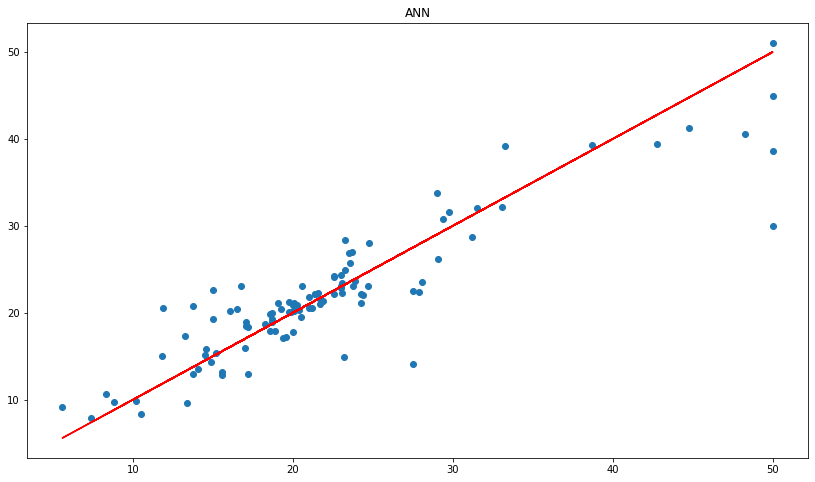

In [159]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.title('ANN')

Text(0.5, 1.0, 'LR')

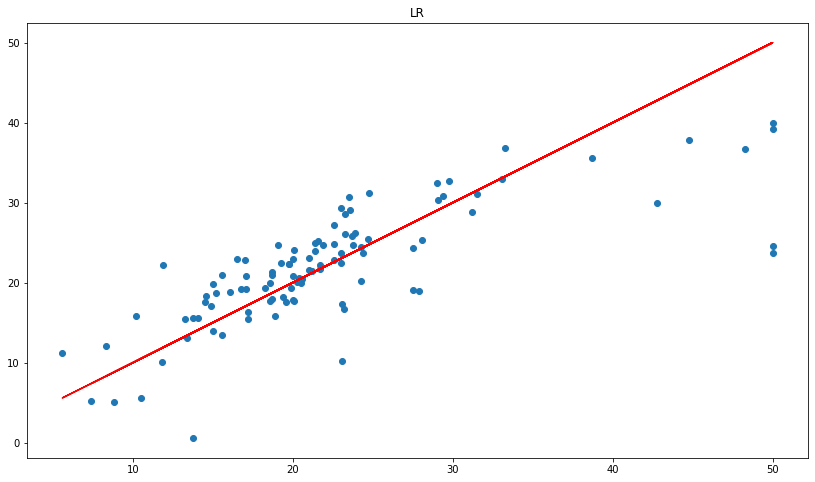

In [160]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('LR')

# Polynominal Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [328]:
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
 poly_features = PolynomialFeatures(degree=2)

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train_poly = poly_features.fit_transform(X_train)

In [333]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_test_predict_poly = poly_model.predict(poly_features.fit_transform(X_test))

In [335]:
y_test_predict_poly

array([ 23.2,  28.5,  27.5,   6.9,  20.8,  21. ,  21.7,  20. ,  18.6,
        24.8,   9.9,  15.8,  13.8,   4.3,  45.9,  32.1,  23. ,  38.9,
        32.4,  21.5,  23. ,  22. ,  20.1,  26.3,  16.6,  25.1,  16. ,
        18.7,  34.8,  14.8,  18.4,  17.5,  19.5,  17.7,  26.3,  16. ,
         7.6,  38.4,  17.2,  15.1,  21.5,  17.1,  20.8,  18.5,  22.5,
        20.2,  19.3,  12. ,  14.2,  23.2, -15.6,  26. ,  21.7,  50.6,
         5.3,  20.7,  15.2,  19.2,  27.5,  19.3,  21.5,  21.7,  31.1,
        31. ,  17.9,  29.9,  15. ,  20.4,  17.2,  19.2,  17.6,  22.5,
        29.1,  28.6,  27.4,   6.5,  42.3,  22.5,  25.8,  18.4,  25.2,
        18.6,  22.8,  41.5,  44.1,  22.6,  23.1,  13.6,  33.9,  16.5,
        28.9,   8.5,  23.2,  27.5,  16.3,  19.7,  12.9,  31.5,  13.3,
        16.2,  24.4,  19.1])

In [0]:
mlr_rmse_ANN = math.sqrt(mean_squared_error(y_test, predictions))
mlr_rmse_ANN

In [336]:
rmse_test_POLY = np.sqrt(mean_squared_error(y_test, y_test_predict_poly))
rmse_test_POLY
  

5.530545453977526

In [172]:
print('Trainning data r_squared: ', poly_model.score(X_train_poly,y_train))

Trainning data r_squared:  0.9518402891629278


In [337]:
MAE_POLY=mean_absolute_error(y_test,y_test_predict_poly)
MAE_POLY

3.5950201843299125

# Visualizing

Text(0.5, 1.0, 'Poly')

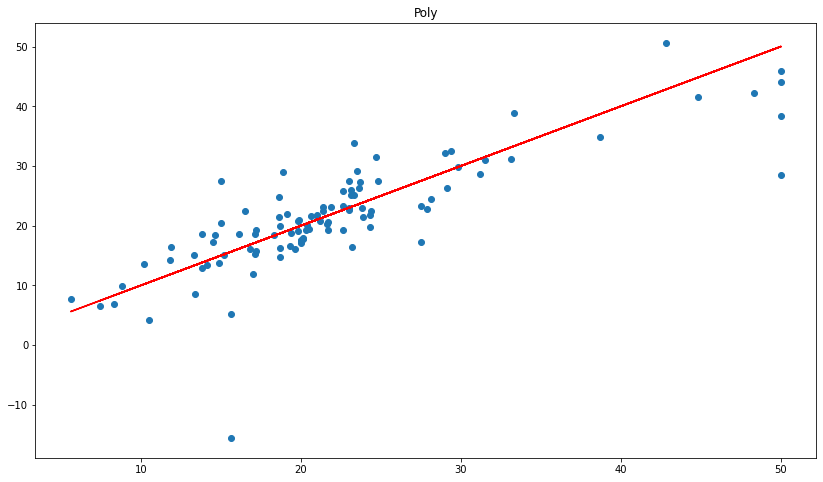

In [174]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_test_predict_poly)
plt.plot(y_test,y_test,'r')
plt.title('Poly')

In [0]:
df3=df.drop('medv',axis=1)

In [176]:
house_prediction_poly=df3.head(10)
house_prediction_poly

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_prediction_poly=poly_model.predict(poly_features.fit_transform(house_prediction_poly))

In [178]:
house_prediction_poly

array([26.2, 20.2, 31.2, 34.5, 33.3, 28.2, 21.9, 18. , 14.7, 22.3])

In [179]:
df_poly = pd.DataFrame(house_prediction_poly, columns=['Predictions_poly'])
df_poly

,Predictions_poly
0,26.185130
1,20.242273
2,31.229378
3,34.547726
4,33.330851
5,28.211071
6,21.896255
7,18.026796
8,14.739570
9,22.343196


In [180]:
data_predicted= pd.concat([df, df_ann,df_lr,df_poly], axis=1)
data_predicted.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predictions_ann,Predictions_lr,Predictions_poly
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.204807,30.499498,26.185130
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.331741,25.172480,20.242273
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.816872,30.546654,31.229378
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.384190,28.606948,34.547726
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,32.175018,27.969583,33.330851
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.085541,25.337665,28.211071
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.806234,23.603188,21.896255
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.170792,20.256071,18.026796
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.147882,12.651475,14.739570
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.906023,19.699869,22.343196


# SVM

In [0]:
from sklearn.svm import SVR

In [338]:
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [0]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [342]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [343]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[25.2 22.6]
 [19.1 50. ]
 [24.6 23. ]
 [13.3  8.3]
 [21.1 21.2]
 [19.4 19.9]
 [20.8 20.6]
 [20.2 18.7]
 [19.1 16.1]
 [19.2 18.6]
 [20.7  8.8]
 [13.1 17.2]
 [14.8 14.9]
 [12.8 10.5]
 [27.3 50. ]
 [30.4 29. ]
 [21.4 23. ]
 [31.8 33.3]
 [28.9 29.4]
 [21.5 21. ]
 [23.8 23.8]
 [21.7 19.1]
 [18.9 20.4]
 [28.  29.1]
 [20.6 19.3]
 [18.  23.1]
 [17.1 19.6]
 [18.6 19.4]
 [34.  38.7]
 [18.6 18.7]
 [15.3 14.6]
 [17.3 20. ]
 [19.7 20.5]
 [21.5 20.1]
 [26.  23.6]
 [20.9 16.8]
 [11.9  5.6]
 [22.3 50. ]
 [14.  14.5]
 [13.3 13.3]
 [23.7 23.9]
 [20.4 20. ]
 [23.1 19.8]
 [15.1 13.8]
 [25.3 16.5]
 [23.4 21.6]
 [19.3 20.3]
 [21.  17. ]
 [16.8 11.8]
 [23.  27.5]
 [20.8 15.6]
 [19.8 23.1]
 [21.5 24.3]
 [29.7 42.8]
 [15.3 15.6]
 [21.3 21.7]
 [20.1 17.1]
 [18.7 17.2]
 [19.3 15. ]
 [21.6 21.7]
 [21.  18.6]
 [21.  21. ]
 [31.7 33.1]
 [28.3 31.5]
 [18.4 20.1]
 [30.  29.8]
 [16.1 15.2]
 [20.3 15. ]
 [13.8 27.5]
 [22.1 22.6]
 [21.  20. ]
 [22.9 21.4]
 [26.8 23.5]
 [29.9 31.2]
 [23.  23.7]
 [12.2  7.4]
 [35.1 48.3]

In [344]:
pd.DataFrame({'y_pred: ':y_pred, 'y_reeal: ':y_test})

,y_pred:,y_reeal:
0,25.223587,22.6
1,19.065835,50.0
2,24.606021,23.0
3,13.262906,8.3
4,21.083118,21.2
...,...,...
97,24.988729,24.7
98,13.707261,14.1
99,17.430025,18.7
100,24.527239,28.1


Text(0.5, 1.0, 'SVR')

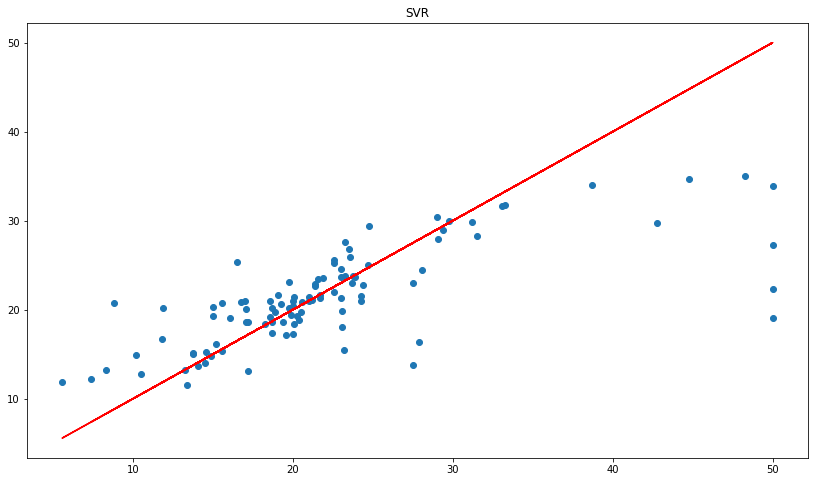

In [345]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('SVR')

In [346]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [347]:
print('Trainning data r_squared: ', regressor.score(X_train,y_train))
print('Test data r_squared: ', regressor.score(X_test,y_test))

Trainning data r_squared:  0.7389982732275268
Test data r_squared:  0.5525833604671697


In [348]:
MAE_SVR=mean_absolute_error(y_test,y_pred)
MAE_SVR

3.618530917197434

In [349]:
import math
mlr_rmse_SVR = math.sqrt(mean_squared_error(y_test, y_pred))
mlr_rmse_SVR

6.401605159252353

In [0]:
df4=df.drop('medv',axis=1)

In [0]:
df4=df4.drop('Unnamed: 0',axis=1)

In [194]:
house_prediction_svm=df4.head(10)
house_prediction_svm

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_prediction_svm=sc.transform(house_prediction_svm.values.reshape(-1,13))

In [0]:
pred_houses_svm = regressor.predict(house_prediction_svm)

In [197]:
pred_houses_svm

array([29.3, 23.1, 31.2, 29. , 29.3, 23.9, 21.6, 19.4, 16.6, 19. ])

In [198]:
df_svm = pd.DataFrame(pred_houses_svm, columns=['Predictions_svm'])
df_svm

,Predictions_svm
0,29.328247
1,23.068567
2,31.225956
3,28.985480
4,29.334102
5,23.913574
6,21.580021
7,19.399650
8,16.600376
9,18.999790


# LR vs ANN vs PR vs SVR

In [199]:
data_predicted= pd.concat([df, df_ann,df_lr,df_poly,df_svm], axis=1)
data_predicted.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predictions_ann,Predictions_lr,Predictions_poly,Predictions_svm
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.204807,30.499498,26.185130,29.328247
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.331741,25.172480,20.242273,23.068567
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.816872,30.546654,31.229378,31.225956
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.384190,28.606948,34.547726,28.985480
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,32.175018,27.969583,33.330851,29.334102
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.085541,25.337665,28.211071,23.913574
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.806234,23.603188,21.896255,21.580021
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.170792,20.256071,18.026796,19.399650
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.147882,12.651475,14.739570,16.600376
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.906023,19.699869,22.343196,18.999790


# Decision Trees Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [350]:
df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [0]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [354]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [355]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[23.7 22.6]
 [23.8 50. ]
 [19.2 23. ]
 [11.7  8.3]
 [21.2 21.2]
 [21.1 19.9]
 [20.6 20.6]
 [19.  18.7]
 [24.5 16.1]
 [16.1 18.6]
 [ 8.3  8.8]
 [17.9 17.2]
 [14.2 14.9]
 [ 8.8 10.5]
 [48.5 50. ]
 [37.  29. ]
 [21.2 23. ]
 [34.6 33.3]
 [24.1 29.4]
 [21.1 21. ]
 [24.7 23.8]
 [19.4 19.1]
 [21.4 20.4]
 [24.7 29.1]
 [18.5 19.3]
 [10.9 23.1]
 [14.5 19.6]
 [16.4 19.4]
 [39.8 38.7]
 [18.8 18.7]
 [12.5 14.6]
 [19.5 20. ]
 [18.9 20.5]
 [23.2 20.1]
 [19.2 23.6]
 [19.9 16.8]
 [10.4  5.6]
 [23.8 50. ]
 [12.5 14.5]
 [17.9 13.3]
 [25.  23.9]
 [18.5 20. ]
 [22.2 19.8]
 [11.7 13.8]
 [36.2 16.5]
 [18.2 21.6]
 [22.4 20.3]
 [16.4 17. ]
 [13.4 11.8]
 [22.8 27.5]
 [19.  15.6]
 [16.2 23.1]
 [19.3 24.3]
 [21.9 42.8]
 [15.6 15.6]
 [18.9 21.7]
 [20.9 17.1]
 [17.5 17.2]
 [10.9 15. ]
 [22.5 21.7]
 [20.6 18.6]
 [22.2 21. ]
 [31.5 33.1]
 [24.1 31.5]
 [19.9 20.1]
 [24.1 29.8]
 [17.4 15.2]
 [27.1 15. ]
 [16.7 27.5]
 [19.3 22.6]
 [24.5 20. ]
 [26.4 21.4]
 [24.8 23.5]
 [30.5 31.2]
 [25.  23.7]
 [ 8.8  7.4]
 [41.7 48.3]

In [356]:
pd.DataFrame({'y_pred: ':y_pred, 'y_reeal: ':y_test})

,y_pred:,y_reeal:
0,23.7,22.6
1,23.8,50.0
2,19.2,23.0
3,11.7,8.3
4,21.2,21.2
...,...,...
97,22.9,24.7
98,12.7,14.1
99,19.7,18.7
100,25.0,28.1


In [357]:
print('Trainning data r_squared: ', regressor.score(X_train,y_train))
print('Test data r_squared: ', regressor.score(X_test,y_test))

Trainning data r_squared:  1.0
Test data r_squared:  0.5443310446304845


In [359]:
MAE_DT=mean_absolute_error(y_test,y_pred)
MAE_DT

3.7401960784313726

In [360]:
import math
mlr_rmse_DT = math.sqrt(mean_squared_error(y_test, y_pred))
mlr_rmse_DT

6.091339078126079

In [0]:
df5=df.drop('medv',axis=1)

In [0]:
df5=df5.drop('Unnamed: 0',axis=1)

In [277]:
house_prediction_dt=df5.head(10)
house_prediction_dt

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
house_prediction_dt=sc.transform(house_prediction_dt.values.reshape(-1,13))

In [0]:
pred_houses_dt = regressor.predict(house_prediction_dt)

In [280]:
df_dt = pd.DataFrame(pred_houses_dt, columns=['Predictions_dt'])
df_dt

,Predictions_dt
0,24.0
1,18.2
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


# LR vs ANN vs PR vs SVR vs DT

In [281]:
data_predicted= pd.concat([df, df_ann,df_lr,df_poly,df_svm,df_dt], axis=1)
data_predicted.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predictions_ann,Predictions_lr,Predictions_poly,Predictions_svm,Predictions_dt
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.204807,30.499498,26.185130,29.328247,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.331741,25.172480,20.242273,23.068567,18.2
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.816872,30.546654,31.229378,31.225956,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.384190,28.606948,34.547726,28.985480,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,32.175018,27.969583,33.330851,29.334102,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,26.085541,25.337665,28.211071,23.913574,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.806234,23.603188,21.896255,21.580021,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.170792,20.256071,18.026796,19.399650,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.147882,12.651475,14.739570,16.600376,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,20.906023,19.699869,22.343196,18.999790,18.9


# Comparison

In [366]:
df['medv'].mean()

22.532806324110698

In [363]:
print('MAE LR :',MAE_LR)
print('MAE ANN :',MAE_ANN)
print('MAE POLY :',MAE_POLY)
print('MAE SVR :',MAE_SVR)
print('MAE DT :',MAE_DT)

MAE LR : 3.838476893830888
MAE ANN : 2.5876094331928328
MAE POLY : 3.5950201843299125
MAE SVR : 3.618530917197434
MAE DT : 3.7401960784313726


In [365]:
print('RMSE LR :',mlr_rmse_LR)
print('RMSE ANN :',mlr_rmse_ANN)
print('RMSE POLY :',rmse_test_POLY)
print('RMSE SVR :',mlr_rmse_SVR)
print('RMSE DT :',mlr_rmse_DT)

RMSE LR : 5.76775185485984
RMSE ANN : 4.292649953280244
RMSE POLY : 5.530545453977526
RMSE SVR : 6.401605159252353
RMSE DT : 6.091339078126079
